### 유투브 랭킹 데이터 수집하기

In [44]:
#라이브러리 추가하기
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

#webdriver로 크롬 브라우저 실행하기
browser = webdriver.Chrome('C:/Myexam/chromedriver/chromedriver.exe')
#url="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
#browser.get(url)

C:\Users\82105\AppData\Local\Temp\ipykernel_11624\3951933464.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:/Myexam/chromedriver/chromedriver.exe')


In [15]:
#페이지 정보 가져오기
html=browser.page_source
soup=BeautifulSoup(html,'html.parser')

In [3]:
#data_list 만들기

data_list=[]

youtube=soup.select('form>table>tbody>tr')
#len(youtube)
for yt in youtube:
    rank=yt.select('td.rank')[0].text.strip()
    category=yt.select('p.category')[0].text.strip()
    title=yt.select('td.subject>h1>a')[0].text.strip()
    subscriber=yt.select('td.subscriber_cnt')[0].text
    view=yt.select('td.view_cnt')[0].text
    video=yt.select('td.video_cnt')[0].text
    data_list.append(['Youtube',rank,category,title,subscriber,view,video])

In [16]:
#페이지별 URL 만들기
page=1
url='https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page='+str(page)
print(url)

https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page=1


In [45]:
#반복문으로 유투브 랭킹 화면의 여러 페이지를 크롤링하기
results=[]
for page in range(1,11):
    url='https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page='+str(page)
    browser.get(url)
    time.sleep(2)
    html=browser.page_source
    html=browser.page_source
    soup=BeautifulSoup(html,'html.parser')
    for yt in youtube:
        rank=yt.select('td.rank')[0].text.strip()
        category=yt.select('p.category')[0].text.strip()
        title=yt.select('td.subject>h1>a')[0].text.strip()
        subscriber=yt.select('td.subscriber_cnt')[0].text
        view=yt.select('td.view_cnt')[0].text
        video=yt.select('td.video_cnt')[0].text
        results.append(['Youtube',rank,category,title,subscriber,view,video])

In [53]:
#데이터 프레임으로 만들기

df=pd.DataFrame(results)
df.columns=['service','rank','category','title','subscriber','view','video']
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   service     1000 non-null   object
 1   rank        1000 non-null   object
 2   category    1000 non-null   object
 3   title       1000 non-null   object
 4   subscriber  1000 non-null   object
 5   view        1000 non-null   object
 6   video       1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


,service,rank,category,title,subscriber,view,video
0,Youtube,1,[음악/댄스/가수],BLACKPINK,8410만,288억3810만,471개
1,Youtube,2,[음악/댄스/가수],BANGTANTV,7330만,193억3031만,"2,097개"
2,Youtube,3,[음악/댄스/가수],HYBE LABELS,6970만,261억0031만,"1,083개"
3,Youtube,4,[음악/댄스/가수],SMTOWN,3140만,263억2081만,"4,069개"
4,Youtube,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개
...,...,...,...,...,...,...,...
995,Youtube,97,[TV/방송],JTBC Drama,470만,51억1498만,"27,198개"
996,Youtube,96,[키즈/어린이],CoCosToy 꼬꼬스토이,470만,29억0197만,671개
997,Youtube,98,[음식/요리/레시피],Cooking tree 쿠킹트리,469만,4억7305만,"1,421개"
998,Youtube,99,[음식/요리/레시피],까니짱 [ G-NI : 蟹ちゃん],467만,13억5866만,727개


In [54]:
df.to_excel('C:\Myexam/youtube_rank.xlsx',index=False)

### 유투브 랭킹 데이터 시각화하기

In [55]:
#라이브러리 추가하기
import matplotlib.pyplot as plt

In [56]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경(윈도우, macOS에 대해 각각 처리
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
 path = 'c:/Windows/Fonts/malgun.ttf'
 font_name = font_manager.FontProperties(fname = path).get_name()
 rc('font', family = font_name)
elif platform.system() == 'Darwin':
 rc('font', family = 'AppleGothic')
else:
 print('Check your OS system')

In [57]:
#엑셀 파일 불러오기
df=pd.read_excel('C:\Myexam\youtube_rank.xlsx')
df

,service,rank,category,title,subscriber,view,video
0,Youtube,1,[음악/댄스/가수],BLACKPINK,8410만,288억3810만,471개
1,Youtube,2,[음악/댄스/가수],BANGTANTV,7330만,193억3031만,"2,097개"
2,Youtube,3,[음악/댄스/가수],HYBE LABELS,6970만,261억0031만,"1,083개"
3,Youtube,4,[음악/댄스/가수],SMTOWN,3140만,263억2081만,"4,069개"
4,Youtube,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개
...,...,...,...,...,...,...,...
995,Youtube,97,[TV/방송],JTBC Drama,470만,51억1498만,"27,198개"
996,Youtube,96,[키즈/어린이],CoCosToy 꼬꼬스토이,470만,29억0197만,671개
997,Youtube,98,[음식/요리/레시피],Cooking tree 쿠킹트리,469만,4억7305만,"1,421개"
998,Youtube,99,[음식/요리/레시피],까니짱 [ G-NI : 蟹ちゃん],467만,13억5866만,727개


In [58]:
#데이터 살펴보기
df['subscriber'][0:10]

0    8410만
1    7330만
2    6970만
3    3140만
4    2650만
5    2640만
6    2590만
7    2440만
8    2020만
9    1860만
Name: subscriber, dtype: object

In [60]:
df['subscriber'].str.replace('만','0000')[0:10]

0    84100000
1    73300000
2    69700000
3    31400000
4    26500000
5    26400000
6    25900000
7    24400000
8    20200000
9    18600000
Name: subscriber, dtype: object

In [61]:
#replaced_subscriber 시리즈 문자열 변경하기
df['replaced_subscriber']=df['subscriber'].str.replace('만','0000')
df.head()

,service,rank,category,title,subscriber,view,video,replaced_subscriber
0,Youtube,1,[음악/댄스/가수],BLACKPINK,8410만,288억3810만,471개,84100000
1,Youtube,2,[음악/댄스/가수],BANGTANTV,7330만,193억3031만,"2,097개",73300000
2,Youtube,3,[음악/댄스/가수],HYBE LABELS,6970만,261억0031만,"1,083개",69700000
3,Youtube,4,[음악/댄스/가수],SMTOWN,3140만,263억2081만,"4,069개",31400000
4,Youtube,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   service              1000 non-null   object
 1   rank                 1000 non-null   int64 
 2   category             1000 non-null   object
 3   title                1000 non-null   object
 4   subscriber           1000 non-null   object
 5   view                 1000 non-null   object
 6   video                1000 non-null   object
 7   replaced_subscriber  1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [63]:
#Series 데이터 타입 변환하기
df['replaced_subscriber'] = df['replaced_subscriber'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   service              1000 non-null   object
 1   rank                 1000 non-null   int64 
 2   category             1000 non-null   object
 3   title                1000 non-null   object
 4   subscriber           1000 non-null   object
 5   view                 1000 non-null   object
 6   video                1000 non-null   object
 7   replaced_subscriber  1000 non-null   int32 
dtypes: int32(1), int64(1), object(6)
memory usage: 58.7+ KB


In [77]:
#카테고리별 구독자 수, 채널 수 피복 테이블 생성하기
pivot_df=df.pivot_table(index='category', values='replaced_subscriber',aggfunc=['sum','count'])
pivot_df

,sum,count
,replaced_subscriber,replaced_subscriber
category,,
[BJ/인물/연예인],1.074000e+08,20
[TV/방송],9.176000e+08,120
[게임],4.550000e+07,10
[뉴스/정치/사회],2.170000e+08,30
[미분류],1.264000e+08,20
[애완/반려동물],4.790000e+07,10
[음식/요리/레시피],1.067800e+09,130
[음악/댄스/가수],6.068800e+09,380


In [79]:
#데이터프레임의 컬럼명 변경하기
pivot_df.columns=['subscriber_sum','category_count']
pivot_df.head()

,subscriber_sum,category_count
category,,
[BJ/인물/연예인],107400000.0,20
[TV/방송],917600000.0,120
[게임],45500000.0,10
[뉴스/정치/사회],217000000.0,30
[미분류],126400000.0,20


In [80]:
#데이터프레임의 인덱스 초기화하기
pivot_df=pivot_df.reset_index()
pivot_df.head()

,category,subscriber_sum,category_count
0,[BJ/인물/연예인],107400000.0,20
1,[TV/방송],917600000.0,120
2,[게임],45500000.0,10
3,[뉴스/정치/사회],217000000.0,30
4,[미분류],126400000.0,20


In [82]:
#데이터프레임을 내림차순정렬하기
pivot_df=pivot_df.sort_values(by='subscriber_sum',ascending=False)
pivot_df.head()

,category,subscriber_sum,category_count
7,[음악/댄스/가수],6.068800e+09,380
8,[키즈/어린이],2.083300e+09,240
6,[음식/요리/레시피],1.067800e+09,130
1,[TV/방송],9.176000e+08,120
3,[뉴스/정치/사회],2.170000e+08,30


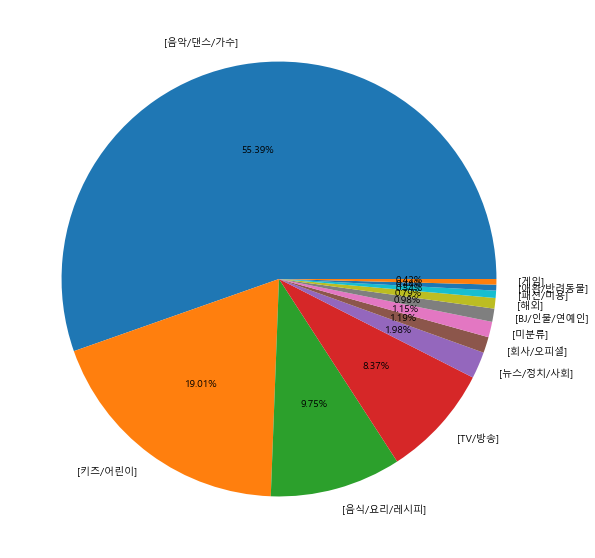

In [86]:
#카테고리별 구독자수 시각화 하기
plt.figure(figsize=(30,10))
plt.pie(pivot_df['subscriber_sum'], labels=pivot_df['category'],autopct='%.2f%%')
plt.show()

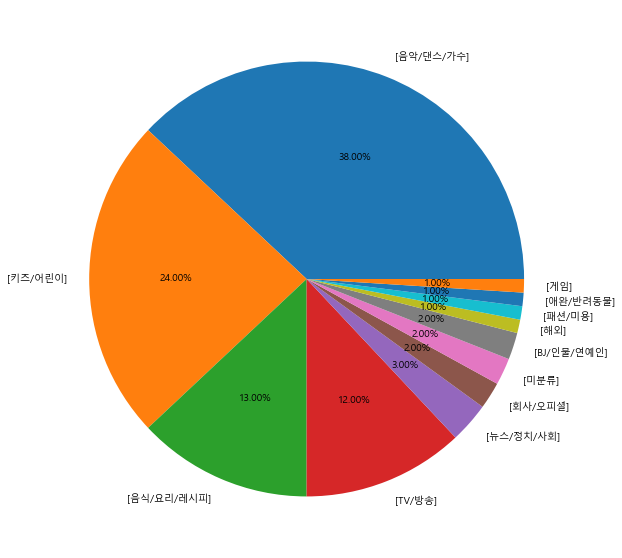

In [87]:
#카테고리별 채널수 시각화 하기
pivot_df=pivot_df.sort_values(by='category_count',ascending=False)
plt.figure(figsize=(30,10))
plt.pie(pivot_df['category_count'], labels=pivot_df['category'],autopct='%.2f%%')
plt.show()